In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)


In [2]:
def asf_project(pr):
    name = pr.split("-")[0]
    if name == "incubator":
        return pr.split("-")[1]
    return name

In [3]:
project = "ozone"

In [4]:
# Parameters
project = "apisix"


In [5]:
actions = pd.read_csv("github-action-run.csv.gz")
                          
actions.createdat = pd.to_datetime(actions.createdat * 1000000, utc = True)
actions.updatedat = pd.to_datetime(actions.updatedat * 1000000, utc = True)
actions.firstjobstarted = pd.to_datetime(actions.firstjobstarted * 1000000, utc = True)
actions.lastjobcompleted = pd.to_datetime(actions.lastjobcompleted * 1000000, utc = True)                

In [6]:
actions["project"] = actions.repo.apply(asf_project)
actions["jobhours"] = actions.jobseconds / 60 / 60
actions["month"] = actions.createdat.dt.strftime("%Y-%m")

In [7]:
actions =  actions[actions.month.isin(["2021-03","2021-02"])]
last_month = "2021-03"
actions = actions[actions.project == project]

## Job executions per month

Maximum available value is 180 * 24 * days == 129600 (30 days) .. 133920 (31 days)

In [8]:
actions[["jobhours"]].groupby(actions.month).agg({"jobhours":["sum","mean", "max", "count"]})

jobhours                            
                 sum      mean        max  count
month                                           
2021-02  1810.404444  0.184641   6.083611   9805
2021-03  2342.009722  0.209183  24.139167  11196

## Number of jobs executed by git repositories (last month)

In [9]:
actions[actions.month == last_month][["repo","jobhours"]].groupby("repo").agg({"jobhours":["sum","mean", "max"]}).sort_values(('jobhours',"sum"), ascending=False).head(20)

jobhours                     
                                   sum      mean        max
repo                                                       
apisix                     1334.527222  0.513477  24.139167
apisix-dashboard            939.392500  0.124654   1.230000
apisix-ingress-controller    37.086667  0.070641   0.431944
apisix-docker                17.500000  0.070850   0.300278
apisix-website               13.493889  0.047181   6.003333
apisix-control-plane          0.009444  0.003148   0.008333

## Job hour statustics per workflows

In [10]:
actions[actions.month == last_month][["repo","workflowid","jobhours"]].groupby(["repo","workflowid"]).agg({"jobhours":["sum","mean", "max"]}).sort_values(('jobhours',"sum"), ascending=False)

jobhours                     
                                             sum      mean        max
repo                      workflowid                                 
apisix                    1828455     871.322778  1.746138  24.139167
apisix-dashboard          3256000     339.420556  0.589272   1.230000
apisix                    4524725     261.831944  0.527887   6.004167
apisix-dashboard          3146054     179.748056  0.312063   0.391389
apisix                    5581251     139.791944  0.287047   0.579722
apisix-dashboard          3584431     124.021667  0.215315   1.146944
                          3397020     111.588611  0.193730   0.508611
                          5550131      67.464722  0.117126   0.169444
apisix                    5261692      54.172222  0.146017   0.291111
apisix-dashboard          4186305      46.535278  0.080233   0.184444
apisix-ingress-controller 4427127      32.522222  0.309735   0.431944
apisix-dashboard          3584432      27.040278  0.046945   0.064722
                          3584429      19.364444  0.033619   0.065278
                          4191476       9.863889  0.017125   0.056667
                          3490577       9.621944  0.016705   0.043056
apisix-docker             4182435       8.515000  0.218333   0.300278
apisix-website            2284688       6.770556  0.041284   0.054167
apisix                    4256088       6.590278  0.017764   0.076111
apisix-website            6864058       6.303611  0.262650   6.003333
apisix-dashboard          4263344       3.848056  0.007902   0.018889
apisix-ingress-controller 4187035       3.616667  0.034444   0.040000
apisix-docker             6876645       3.375556  0.168778   0.192500
                          6149185       3.175556  0.083567   0.107500
                          4182434       1.203611  0.030862   0.039444
                          2139764       0.917222  0.023519   0.028889
apisix-dashboard          3146052       0.805000  0.001398   0.004722
apisix                    5694157       0.696389  0.001877   0.006111
apisix-ingress-controller 4237564       0.638056  0.006077   0.010833
apisix-website            4263745       0.419722  0.004283   0.009444
apisix-docker             1385190       0.229444  0.005883   0.009167
apisix-ingress-controller 4235787       0.171667  0.001635   0.005278
                          4188839       0.138056  0.001315   0.002222
apisix                    4868768       0.121667  0.060833   0.062500
apisix-docker             4264890       0.083611  0.002534   0.004444
apisix-dashboard          7338282       0.070000  0.035000   0.052778
apisix-control-plane      2224788       0.008333  0.008333   0.008333
                          2580980       0.001111  0.001111   0.001111
apisix-dashboard          4186810       0.000000  0.000000   0.000000
                          4104567       0.000000  0.000000   0.000000
apisix                    7267192       0.000000  0.000000   0.000000
apisix-control-plane      2336469       0.000000  0.000000   0.000000

## Slowest workflow runs


In [11]:
actions.sort_values("jobhours", ascending=False).head(25)

,org,repo,id,runnumber,createdat,updatedat,status,conclusion,workflowid,firstjobstarted,lastjobcompleted,jobdetails,jobs,jobseconds,project,jobhours,month
206762,apache,apisix,667374600,5002,2021-03-19 08:55:27+00:00,2021-03-19 16:35:46+00:00,completed,failure,1828455,2021-03-19 10:22:09+00:00,2021-03-19 16:35:38+00:00,True,7,86901,apisix,24.139167,2021-03
206744,apache,apisix,666600743,4988,2021-03-19 02:35:17+00:00,2021-03-19 09:31:53+00:00,completed,failure,1828455,2021-03-19 03:22:29+00:00,2021-03-19 09:31:46+00:00,True,7,86883,apisix,24.134167,2021-03
206767,apache,apisix,667489106,5007,2021-03-19 09:40:27+00:00,2021-03-19 18:50:53+00:00,completed,failure,1828455,2021-03-19 12:40:41+00:00,2021-03-19 18:50:46+00:00,True,7,86871,apisix,24.130833,2021-03
206765,apache,apisix,667434185,5005,2021-03-19 09:19:08+00:00,2021-03-19 18:00:43+00:00,completed,failure,1828455,2021-03-19 11:48:20+00:00,2021-03-19 18:00:35+00:00,True,7,86869,apisix,24.130278,2021-03
206772,apache,apisix,670021318,5011,2021-03-20 04:19:47+00:00,2021-03-20 10:22:46+00:00,completed,failure,1828455,2021-03-20 04:20:32+00:00,2021-03-20 10:22:40+00:00,True,7,86868,apisix,24.130000,2021-03
206749,apache,apisix,666687974,4992,2021-03-19 03:21:27+00:00,2021-03-19 11:03:39+00:00,completed,failure,1828455,2021-03-19 04:55:51+00:00,2021-03-19 11:03:32+00:00,True,7,86866,apisix,24.129444,2021-03
206771,apache,apisix,669962323,5010,2021-03-20 03:42:02+00:00,2021-03-20 09:47:27+00:00,completed,failure,1828455,2021-03-20 03:43:47+00:00,2021-03-20 09:47:21+00:00,True,7,86864,apisix,24.128889,2021-03
206756,apache,apisix,667177926,4999,2021-03-19 07:29:55+00:00,2021-03-19 14:40:06+00:00,completed,failure,1828455,2021-03-19 08:30:19+00:00,2021-03-19 14:39:59+00:00,True,7,86854,apisix,24.126111,2021-03
216964,apache,apisix,547412709,36,2021-02-08 08:47:34+00:00,2021-02-08 15:16:19+00:00,completed,failure,5581251,2021-02-08 09:11:17+00:00,2021-02-08 15:16:18+00:00,True,1,21901,apisix,6.083611,2021-02
216731,apache,apisix,539850847,15,2021-02-05 08:43:52+00:00,2021-02-05 15:12:45+00:00,completed,failure,5581251,2021-02-05 09:07:43+00:00,2021-02-05 15:12:44+00:00,True,1,21901,apisix,6.083611,2021-02


In [12]:
job = pd.read_csv("github-action-job.csv.gz")                          
job.startedat = pd.to_datetime(job.startedat * 1000000, utc = True)
job.completedat = pd.to_datetime(job.completedat * 1000000, utc = True)
job["project"] = job.repo.apply(asf_project)

In [13]:
job["jobhours"] = (job.completedat - job.startedat).dt.seconds / 60 / 60

In [14]:
job = job[job.project == project]

## Slowest job executions by job names

In [15]:
job[["jobhours"]].groupby([job.org,job.repo, job.name]).sum().reset_index().sort_values("jobhours", ascending=False).head(25)

,org,repo,name,jobhours
41,apache,apisix-dashboard,Frontend e2e test,778.581389
31,apache,apisix,run ci on centos7,616.598333
23,apache,apisix,"build (ubuntu-18.04, linux_openresty)",601.661667
25,apache,apisix,"build (ubuntu-18.04, linux_openresty_1_17)",525.637222
24,apache,apisix,"build (ubuntu-18.04, linux_openresty_1_15)",460.281944
32,apache,apisix,run fuzzing,288.207778
48,apache,apisix-dashboard,build,254.551944
27,apache,apisix,"build (ubuntu-18.04, linux_tengine)",197.116111
9,apache,apisix,Check Markdown links Node 14 - x64 on macos-la...,175.646389
56,apache,apisix-dashboard,make build test,155.018889


## Number of job executions per status

In [16]:
job[["id"]].groupby([job.org,job.repo,  job.conclusion]).count().reset_index().sort_values("id", ascending=False).head(25)

,org,repo,conclusion,id
6,apache,apisix-dashboard,success,23881
2,apache,apisix,success,16072
1,apache,apisix,failure,2127
10,apache,apisix-ingress-controller,success,2113
5,apache,apisix-dashboard,failure,1321
8,apache,apisix-docker,success,820
13,apache,apisix-website,success,798
4,apache,apisix-dashboard,cancelled,210
9,apache,apisix-ingress-controller,failure,141
0,apache,apisix,cancelled,127


In [17]:
start = job.loc[:,["org","repo","project","id","runid","startedat"]]
start["value"] = 1
start = start.rename(columns={"startedat":"date"})

end = job.loc[:,["org","repo","project","id","runid","completedat"]]
end["value"] = -1
end = end.rename(columns={"completedat":"date"})
events = pd.concat([start, end]).sort_values("date")
events["running"] = events.value.cumsum()


## Average (12h window) parallel running/queued job at a given time

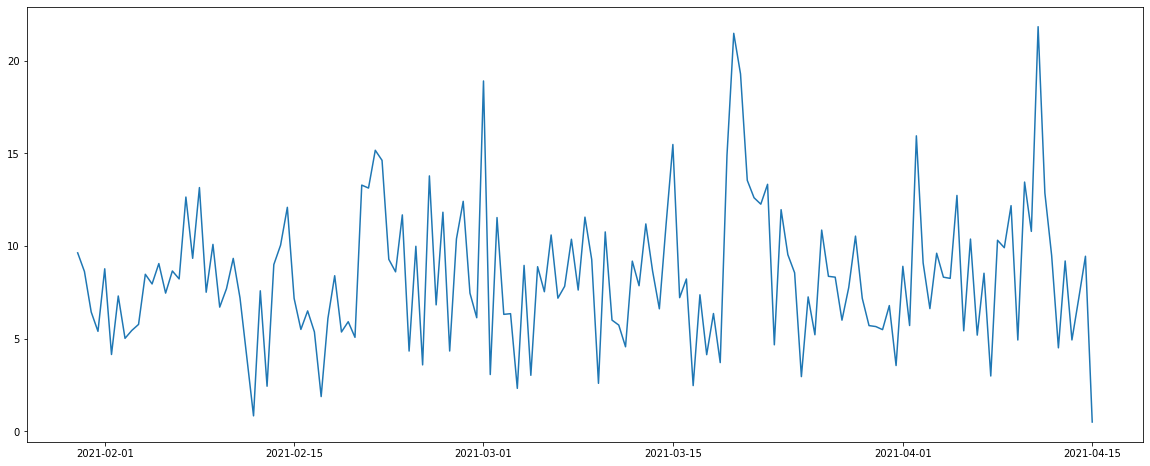

In [18]:

r = events.set_index('date')
r = r.sort_index()
r = r.resample("12H").mean().fillna(0)

plt.figure(figsize=(20,8))
plt.plot(r.index,r.running)
plt.show()

In [19]:
## Max (12h window) parallel running/queued job at a given time

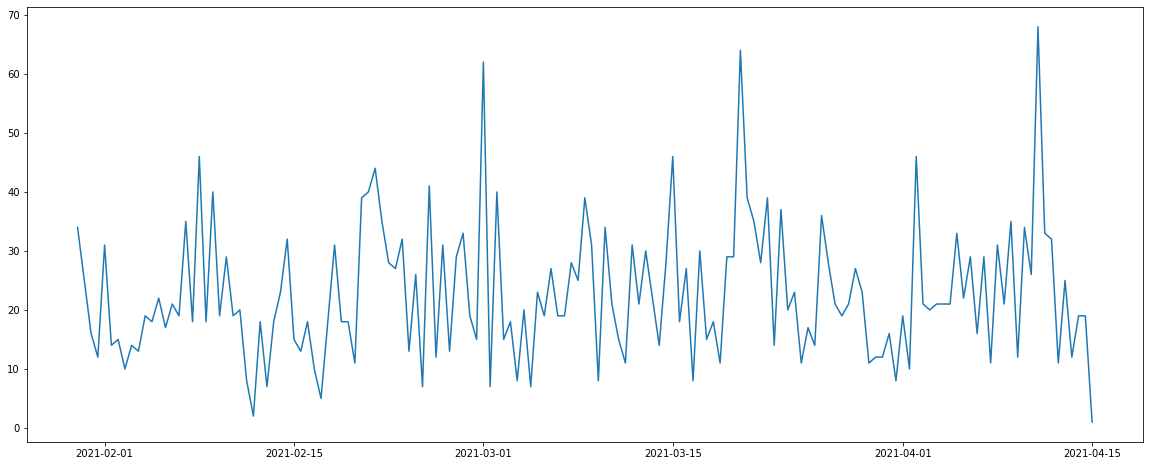

In [20]:

r = events.set_index('date')
r = r.sort_index()
r = r.resample("12H").max().fillna(0)

plt.figure(figsize=(20,8))
plt.plot(r.index,r.running)
plt.show()